In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate

In [2]:
path = './data/observatories/'
scan = os.scandir(path)
file_list = [x.name for x in scan if x.name.endswith('.csv.gz') if x.name.endswith('_roll.csv.gz')]
file_list.sort()
file_list[:5]

['obs_106_R_roll.csv.gz',
 'obs_291_V_roll.csv.gz',
 'obs_608_0_roll.csv.gz',
 'obs_644_0_roll.csv.gz',
 'obs_644_R_roll.csv.gz']

In [3]:
df = pd.read_csv(os.path.join(path, 'obs_704_0_roll.csv.gz'))
df

epoch  mean_mag_deltaV  median_mag_deltaV  std_mag_deltaV
0      2.450836e+06         0.607039           0.617699        0.729017
1      2.450837e+06         0.607243           0.617699        0.728792
2      2.450837e+06         0.606039           0.617699        0.730091
3      2.450837e+06         0.604385           0.617699        0.731397
4      2.450837e+06         0.605905           0.617699        0.729766
...             ...              ...                ...             ...
77570  2.456427e+06         0.178088           0.191313        0.256755
77571  2.456427e+06         0.178281           0.192893        0.256787
77572  2.456427e+06         0.178421           0.192893        0.256815
77573  2.456427e+06         0.178983           0.192893        0.256489
77574  2.456427e+06         0.178815           0.192893        0.256653

[77575 rows x 4 columns]

In [4]:
df = df.drop_duplicates(subset=['epoch'], keep='first')
df

epoch  mean_mag_deltaV  median_mag_deltaV  std_mag_deltaV
0      2.450836e+06         0.607039           0.617699        0.729017
1      2.450837e+06         0.607243           0.617699        0.728792
2      2.450837e+06         0.606039           0.617699        0.730091
3      2.450837e+06         0.604385           0.617699        0.731397
4      2.450837e+06         0.605905           0.617699        0.729766
...             ...              ...                ...             ...
77570  2.456427e+06         0.178088           0.191313        0.256755
77571  2.456427e+06         0.178281           0.192893        0.256787
77572  2.456427e+06         0.178421           0.192893        0.256815
77573  2.456427e+06         0.178983           0.192893        0.256489
77574  2.456427e+06         0.178815           0.192893        0.256653

[77575 rows x 4 columns]

(187,)


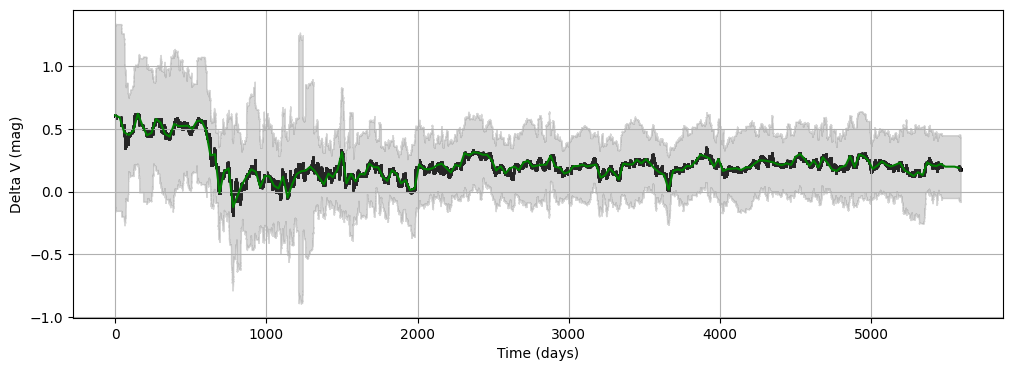

In [17]:
plt.figure(figsize=(12, 4))
t0 = df['epoch'].min()
t1 = df['epoch'].max()
plt.scatter(df['epoch'] - t0, df['mean_mag_deltaV'], s=1, color='black')
plt.fill_between(df['epoch'] - t0, df['mean_mag_deltaV'] - df['std_mag_deltaV'], df['mean_mag_deltaV'] + df['std_mag_deltaV'], 
                 alpha=0.3, color='grey')

# smoothed_signal = gaussian_filter1d(df['mean_mag_deltaV'].values, 365.25)
# plt.plot(df['epoch'] - t0, smoothed_signal, color='red')

step_size = 30
x_uniform = np.arange(0, t1-t0, step_size)
print(x_uniform.shape)
f_linear = interpolate.interp1d(df['epoch'] - t0,df['mean_mag_deltaV'], kind='linear')
y_uniform = f_linear(x_uniform)
slopes = (y_uniform[1:] - y_uniform[:-1]) / (x_uniform[1:] - x_uniform[:-1])
intercepts = y_uniform[:-1] - slopes * x_uniform[:-1]

df_uniform = pd.DataFrame()
df_uniform['epoch'] = x_uniform + t0
df_uniform['mag_linear'] = y_uniform
df_uniform['slope'] = np.append(slopes, slopes[-1])
df_uniform['intercept'] = np.append(intercepts, intercepts[-1])

# plt.plot(x_uniform, f_smooth_cubic(x_uniform), color='blue')
plt.plot(x_uniform, y_uniform, color='green')

plt.xlabel('Time (days)')
plt.ylabel('Delta V (mag)')
plt.grid()
plt.show()

Slopes: [ 1.56726821 -1.88693046 -6.46875521  2.94342875]
Intercepts: [  6.08573443  12.99413178  26.73960603 -10.90912979]


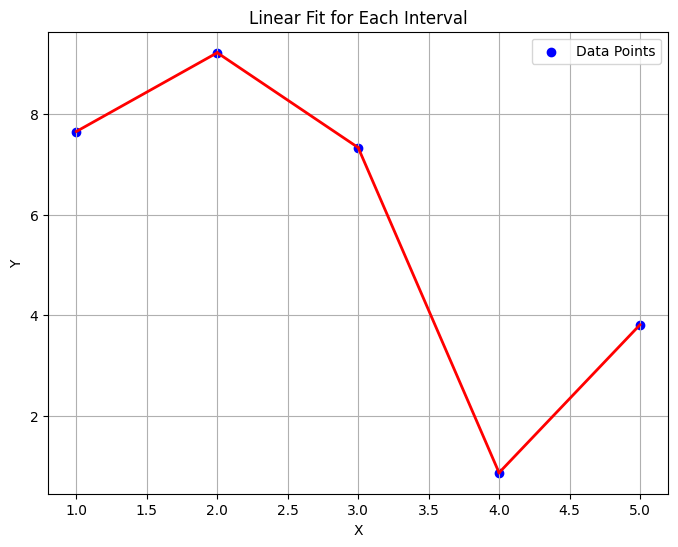

In [14]:
# Example x and y arrays
x = np.array([1, 2, 3, 4, 5])
y = np.random.random(x.shape)*10

# Calculate slopes and intercepts using numpy vectorized operations
slopes = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
intercepts = y[:-1] - slopes * x[:-1]

# Output the results
print("Slopes:", slopes)
print("Intercepts:", intercepts)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')

# Plot each linear fit
for i in range(len(slopes)):
    # Define the x range for each line segment
    line_x = np.array([x[i], x[i+1]])
    # Calculate the corresponding y values
    line_y = slopes[i] * line_x + intercepts[i]
    # Plot the line segment
    plt.plot(line_x, line_y, color='red', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit for Each Interval')
plt.legend()
plt.grid(True)
plt.show()


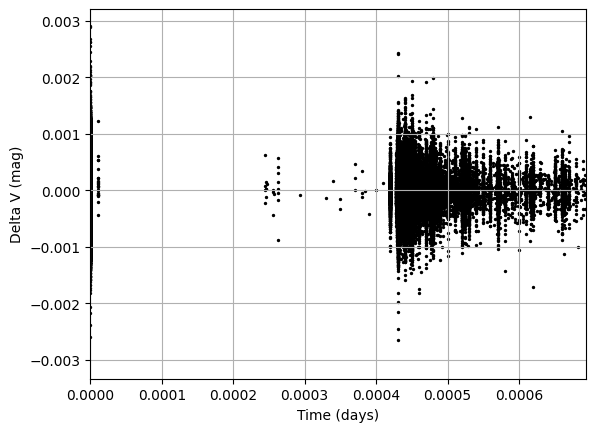

In [97]:
plt.scatter(df['epoch'].diff(), df['mean_mag_deltaV'].diff(), s=2, color='black')
plt.xlabel('Time (days)')
plt.ylabel('Delta V (mag)')
plt.xlim(0, 1/24/60)
plt.grid()
plt.show()

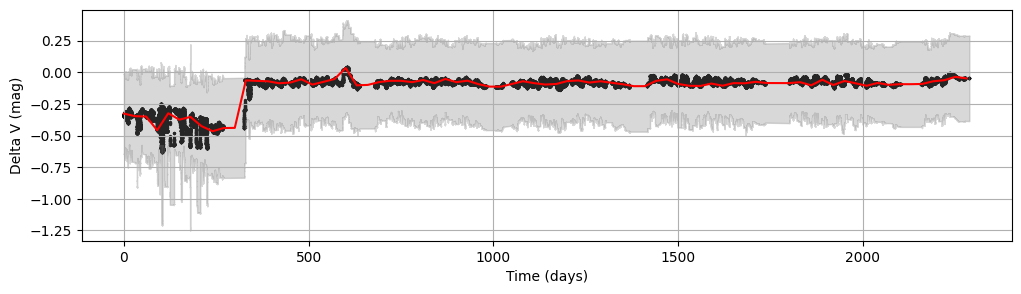

In [38]:
plt.figure(figsize=(12, 3))
# Define uniform grid
start = df['epoch'].min()
end = df['epoch'].max()
step_size = 30  # Choose your step size
x_uniform = np.arange(start-start, end-start, step_size)

# Interpolate to get y values for the uniform x points
flinear = interpolate.interp1d(df['epoch']-start, df['mean_mag_deltaV'], kind='linear')
y_linear = flinear(x_uniform)
fcubic = interpolate.interp1d(df['epoch']-start, df['mean_mag_deltaV'], kind='cubic')
y_cubic = fcubic(x_uniform)

plt.scatter(df['epoch'] - t0, df['mean_mag_deltaV'], s=2, color='black')
plt.fill_between(df['epoch'] - t0, df['mean_mag_deltaV'] - df['std_mag_deltaV'], df['mean_mag_deltaV'] + df['std_mag_deltaV'], 
                 alpha=0.3, color='grey')
# plt.plot(x_uniform, y_cubic, color='red')
plt.plot(x_uniform, y_linear, color='red')
plt.xlabel('Time (days)')
plt.ylabel('Delta V (mag)')
plt.grid()
plt.show()

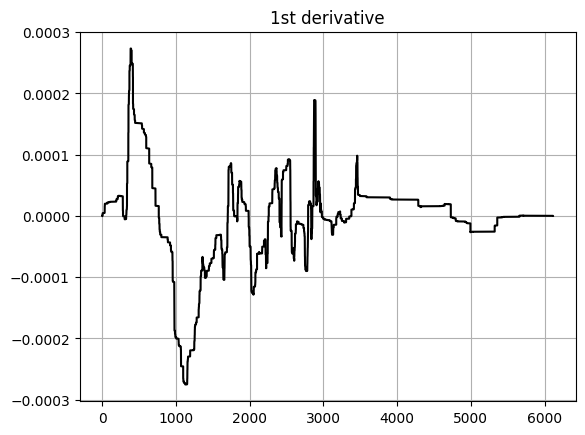

In [49]:
mag_1stdev = np.gradient(smoothed_signal)
# plt.plot(mag_1stdev)
plt.plot(df['epoch'] - t0, mag_1stdev, color='black')
plt.title('1st derivative')
plt.grid()
plt.show()


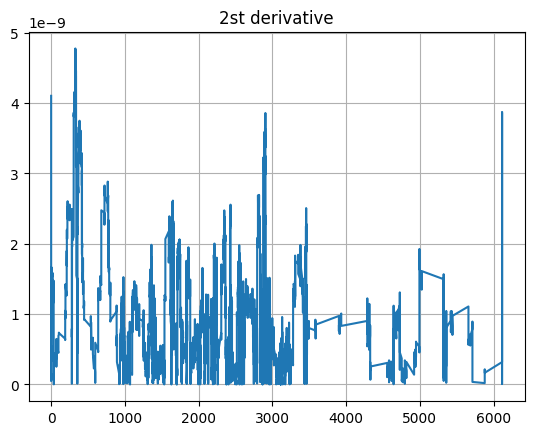

In [51]:
mag_2stdev = np.gradient(mag_1stdev)
mag_2stdev_clipped = np.abs(np.gradient(mag_2stdev))
# plt.plot(df['epoch'] - t0, mag_2stdev)
plt.plot(df['epoch'] - t0, mag_2stdev_clipped)
plt.title('2st derivative')
plt.grid()
plt.show()

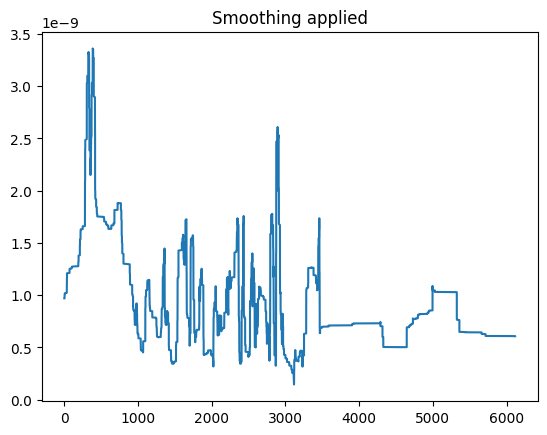

In [57]:
smoothed_signal_2dev = gaussian_filter1d(mag_2stdev_clipped, 100)
plt.title('Smoothing applied')
plt.plot(df['epoch'] - t0, smoothed_signal_2dev)
# plt.plot(smoothed_signal_2dev)
plt.show()

In [7]:
import numpy as np
from scipy.interpolate import interp1d

# Example non-uniform data
x_non_uniform = np.sort(np.random.rand(20) * 10)  # Random points in range 0 to 10
y_non_uniform = np.sin(x_non_uniform)  # For example, y = sin(x)

# Define uniform grid
start = min(x_non_uniform)
end = max(x_non_uniform)
step_size = 0.5  # Choose your step size
x_uniform = np.arange(start, end, step_size)

# Interpolate to get y values for the uniform x points
interpolator = interp1d(x_non_uniform, y_non_uniform, kind='linear')
y_uniform = interpolator(x_uniform)

# y_uniform now contains the y values corresponding to the uniform x points


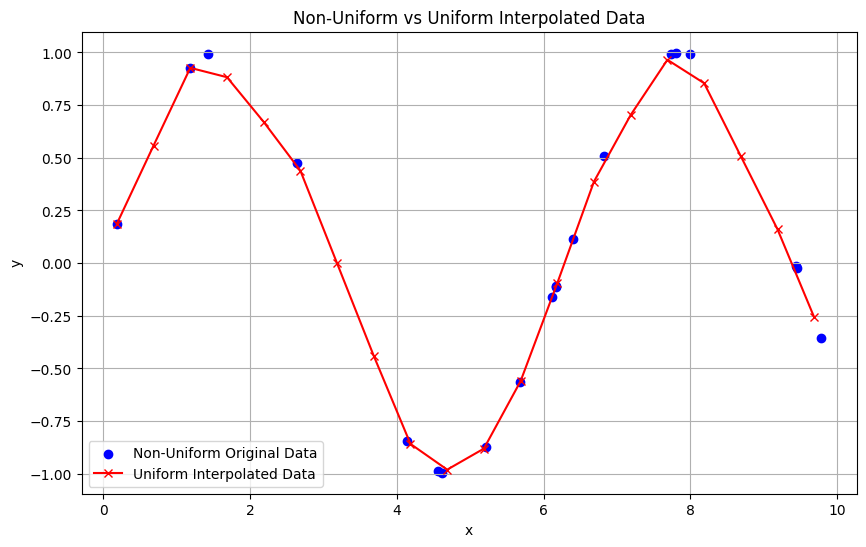

In [8]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x_non_uniform, y_non_uniform, color='blue', label='Non-Uniform Original Data', marker='o')
plt.plot(x_uniform, y_uniform, color='red', label='Uniform Interpolated Data', linestyle='-', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-Uniform vs Uniform Interpolated Data')
plt.legend()
plt.grid(True)
plt.show()